# Enter Student Name & ID

In [ ]:
student_id = 400100746  #@param {type:"integer"}
student_name = "Hosein Anjidani" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)

your student id: 400100746
your name: Hosein Anjidani


## Part 1. Implementing Your Own PCA Function.

### 1.1 Complete the function below using only the `numpy` library.

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score


In [ ]:
def myPCA(X, num_components):
    # Step 1: Standardize the data
    X_meaned = X - np.mean(X, axis=0)

    # Step 2: Compute the covariance matrix
    cov_matrix = np.cov(X_meaned, rowvar=False)

    # Step 3: Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Step 4: Sort eigenvectors by eigenvalues in descending order
    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_index]

    # Step 5: Select the top num_components eigenvectors
    eigenvector_subset = sorted_eigenvectors[:, :num_components]

    # Step 6: Transform the data
    X_reduced = np.dot(X_meaned, eigenvector_subset)

    return X_reduced

### 1.2 Perform your PCA function on the IRIS dataset, reduce it to 2D, and plot the results.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

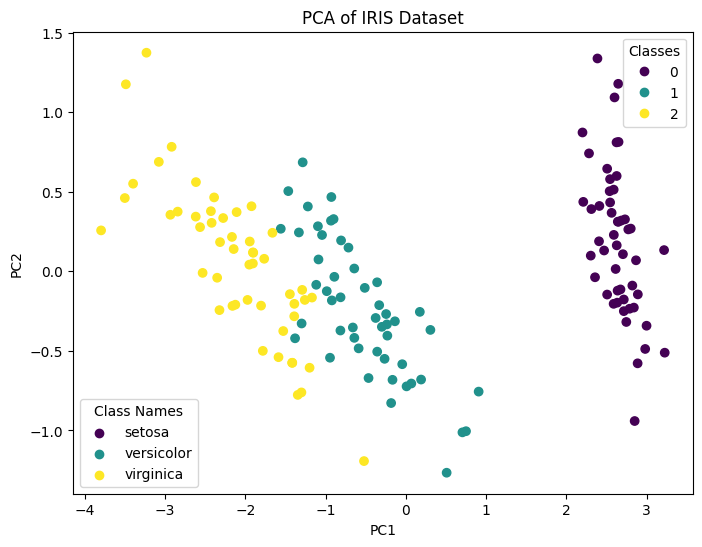

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

# Perform PCA to reduce to 2D
X_pca = myPCA(X, 2)

# Plot the results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of IRIS Dataset')

# Correct the legend creation
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend1)

# Add class labels to the legend
for i, class_name in enumerate(iris.target_names):
    plt.scatter([], [], color=scatter.cmap(scatter.norm(i)), label=class_name)
plt.legend(title="Class Names")

plt.show()

## Part 2. Faces Dataset

The dataset contains a total of 40 folders, each contains 10 images depicting a specific individual in ten different states.

### 2.1  Describe eigenfaces and how they are related to PCA.

`Answer 2.1: `
Eigenfaces are a set of eigenvectors used in the computer vision problem of human face recognition. They are derived from the covariance matrix of the probability distribution over the high-dimensional vector space of face images.

### What are Eigenfaces?

1. **Concept**: Eigenfaces are the principal components of a set of face images. Each face image is treated as a high-dimensional vector (each pixel is a dimension), and eigenfaces are the directions in which the data varies the most.

2. **Creation**:
   - A dataset of face images is gathered and each image is represented as a vector.
   - The mean face is computed and subtracted from each face vector to center the data.
   - The covariance matrix of the centered data is computed.
   - Eigenvalues and eigenvectors of the covariance matrix are calculated.
   - The eigenvectors (principal components) with the largest eigenvalues are chosen. These eigenvectors are reshaped back into the original image shape to form eigenfaces.

3. **Usage**: Eigenfaces form a basis set for face images. Any face image can be approximated as a weighted sum of these eigenfaces. By projecting a face image onto the space spanned by the top eigenfaces, we get a set of coefficients (or weights) that can be used for face recognition tasks.

### Relationship to PCA

1. **Principal Component Analysis (PCA)**:
   - PCA is a statistical technique used to reduce the dimensionality of data while preserving as much variability as possible.
   - It identifies the directions (principal components) along which the variance of the data is maximized.
   - The first principal component accounts for the most variance, the second for the second most, and so on.

2. **Eigenfaces as PCA**:
   - In the context of face recognition, each face image is a high-dimensional vector (with dimensionality equal to the number of pixels).
   - PCA is applied to this set of face vectors to find the principal components, which are the eigenfaces.
   - The top principal components (eigenfaces) capture the most significant features of the face images, reducing the dimensionality of the dataset while retaining important information.

3. **Dimensionality Reduction**:
   - By projecting face images onto the subspace defined by the top eigenfaces, we reduce the dimensionality of the face data.
   - This projection helps in efficiently storing and comparing face images since the dimensionality of the projected data (the coefficients) is much lower than the original image dimensionality.

### Process of Creating Eigenfaces with PCA

1. **Prepare the dataset**: Collect a set of face images, and convert each image into a vector.
2. **Mean centering**: Compute the mean face image and subtract it from each face vector.
3. **Compute covariance matrix**: Calculate the covariance matrix of the centered data.
4. **Eigen decomposition**: Perform eigen decomposition on the covariance matrix to get eigenvalues and eigenvectors.
5. **Select top eigenfaces**: Choose the eigenvectors corresponding to the largest eigenvalues (these are the eigenfaces).
6. **Project images**: Project the original face images onto the eigenface space to get a set of coefficients for each image.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

### 2.2 Read the given dataset and create train and test matrices.
For each person, use the first five images for training and the second five images for test (`X_train`, `X_test`). Also, create labels for them (`y_train`, `y_test`).

Note: For reading the images, you can use opencv library. You can install this library using the below command in terminal:

In [ ]:
## Mount Drive
from google.colab import drive
drive.mount('/content/drive')
folder_path = '/content/drive/MyDrive/UNI/Sem 6/ML/CHW4/Q1'

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np

def readimgs(directory, image_size=(64, 64)):
    X_train, y_train, X_test, y_test = [], [], [], []
    label = 0

    for person_name in sorted(os.listdir(directory)):
        person_dir = os.path.join(directory, person_name)
        if not os.path.isdir(person_dir):
            continue

        print(f"Loading images from {person_dir}")
        images = []

        for image_name in sorted(os.listdir(person_dir)):
            image_path = os.path.join(person_dir, image_name)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is None:
                print(f"Error loading image: {image_path}")
                continue
            image = cv2.resize(image, image_size)
            images.append(image)

        if len(images) == 10:
            X_train.extend(images[:5])
            y_train.extend([label] * 5)
            X_test.extend(images[5:])
            y_test.extend([label] * 5)
            label += 1
        else:
            print(f"Warning: {person_dir} does not contain exactly 10 images (found {len(images)})")

    return np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

In [ ]:
X_train, X_test, y_train, y_test = readimgs(os.path.join(folder_path, 'ORL/'))

Loading images from /content/drive/MyDrive/UNI/Sem 6/ML/CHW4/Q1/ORL/s1
Loading images from /content/drive/MyDrive/UNI/Sem 6/ML/CHW4/Q1/ORL/s10
Loading images from /content/drive/MyDrive/UNI/Sem 6/ML/CHW4/Q1/ORL/s11
Loading images from /content/drive/MyDrive/UNI/Sem 6/ML/CHW4/Q1/ORL/s12
Loading images from /content/drive/MyDrive/UNI/Sem 6/ML/CHW4/Q1/ORL/s13
Loading images from /content/drive/MyDrive/UNI/Sem 6/ML/CHW4/Q1/ORL/s14
Loading images from /content/drive/MyDrive/UNI/Sem 6/ML/CHW4/Q1/ORL/s15
Loading images from /content/drive/MyDrive/UNI/Sem 6/ML/CHW4/Q1/ORL/s16
Loading images from /content/drive/MyDrive/UNI/Sem 6/ML/CHW4/Q1/ORL/s17
Loading images from /content/drive/MyDrive/UNI/Sem 6/ML/CHW4/Q1/ORL/s18
Loading images from /content/drive/MyDrive/UNI/Sem 6/ML/CHW4/Q1/ORL/s19
Loading images from /content/drive/MyDrive/UNI/Sem 6/ML/CHW4/Q1/ORL/s2
Loading images from /content/drive/MyDrive/UNI/Sem 6/ML/CHW4/Q1/ORL/s20
Loading images from /content/drive/MyDrive/UNI/Sem 6/ML/CHW4/Q1/OR

`pip install opencv-python`

### 2.3 Performing PCA.

In [ ]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
num_components = 45
pca = PCA(n_components=num_components, random_state=42)
pca.fit(X_train_flat)
X_train_pca = pca.transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

Perform PCA on the data and reduce the dimensionality to a suitable range (e.g., between 40 and 50).

### 2.4 Training a Classifier
Train an LDA classifier on the PCA-transformed data and report the accuracy.

### 2.5 Varying PCA Dimensions

Repeat the process for different dimensions of PCA (vary from 100 to 40) and discuss the results.

How many features do you think are sufficient? The accuracy drops alittle after 85 component reduction.


In [ ]:
# Initialize LDA classifier
lda = LDA(solver='eigen',shrinkage='auto')

# Fit LDA on PCA-transformed training data
lda.fit(X_train_pca, y_train)

# Predict labels for test data
y_pred = lda.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of LDA classifier on PCA-transformed data: {accuracy:.2f}')
for num_components in range(100, 39, -1):  # Adjust range and step size as needed
    # Create PCA object
    pca = PCA(n_components=num_components, random_state=42)

    # Fit PCA on the training data
    pca.fit(X_train_flat)

    # Transform both training and testing data
    X_train_pca = pca.transform(X_train_flat)
    X_test_pca = pca.transform(X_test_flat)

    # Apply LDA on the PCA-transformed data
    lda = LDA()
    lda.fit(X_train_pca, y_train)

    # Predict on the test set
    y_pred = lda.predict(X_test_pca)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy of LDA classifier on PCA-transformed data with {num_components} components: {accuracy:.2f}')

Accuracy of LDA classifier on PCA-transformed data: 0.91
Accuracy of LDA classifier on PCA-transformed data with 100 components: 0.94
Accuracy of LDA classifier on PCA-transformed data with 99 components: 0.94
Accuracy of LDA classifier on PCA-transformed data with 98 components: 0.94
Accuracy of LDA classifier on PCA-transformed data with 97 components: 0.94
Accuracy of LDA classifier on PCA-transformed data with 96 components: 0.94
Accuracy of LDA classifier on PCA-transformed data with 95 components: 0.96
Accuracy of LDA classifier on PCA-transformed data with 94 components: 0.95
Accuracy of LDA classifier on PCA-transformed data with 93 components: 0.94
Accuracy of LDA classifier on PCA-transformed data with 92 components: 0.94
Accuracy of LDA classifier on PCA-transformed data with 91 components: 0.94
Accuracy of LDA classifier on PCA-transformed data with 90 components: 0.94
Accuracy of LDA classifier on PCA-transformed data with 89 components: 0.94
Accuracy of LDA classifier on 